In [1]:
# パッケージのインポート
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

In [6]:
# データセットの準備
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
# データセットのシェイプの確認
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


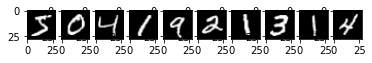

In [8]:
# データセットの画像の確認
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i], 'gray')
plt.show()

# データセットのラベルの確認
print(train_labels[0:10])

In [9]:
# データセットの画像の前処理
train_images = train_images.reshape((train_images.shape[0], 784))
test_images = test_images.reshape((test_images.shape[0], 784))

# データセットの画像の前処理後のシェイプの確認
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [10]:
# データセットのラベルの前処理
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# データセットのラベルの前処理後のシェイプの確認
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


In [11]:
# モデルの作成
model = Sequential()
model.add(Dense(256, activation='sigmoid', input_shape=(784,))) # 入力層
model.add(Dense(128, activation='sigmoid')) # 隠れ層
model.add(Dropout(rate=0.5)) # ドロップアウト
model.add(Dense(10, activation='softmax')) # 出力層

2021-08-26 21:34:10.439510: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# コンパイル
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1), metrics=['acc'])

/Users/kzyngkr/hobby/ML/ReinforcementLearning/venv/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [13]:
# 学習
history = model.fit(train_images, train_labels, batch_size=500, 
    epochs=5, validation_split=0.2)

2021-08-26 21:34:10.765937: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
96/96 [==============================] - 1s 9ms/step - loss: 1.7405 - acc: 0.4348 - val_loss: 1.0313 - val_acc: 0.8321
Epoch 2/5
96/96 [==============================] - 1s 6ms/step - loss: 0.9557 - acc: 0.7322 - val_loss: 0.5999 - val_acc: 0.8815
Epoch 3/5
96/96 [==============================] - 0s 5ms/step - loss: 0.6794 - acc: 0.8130 - val_loss: 0.4418 - val_acc: 0.9002
Epoch 4/5
96/96 [==============================] - 0s 5ms/step - loss: 0.5503 - acc: 0.8499 - val_loss: 0.3708 - val_acc: 0.9078
Epoch 5/5
96/96 [==============================] - 0s 5ms/step - loss: 0.4796 - acc: 0.8686 - val_loss: 0.3285 - val_acc: 0.9136


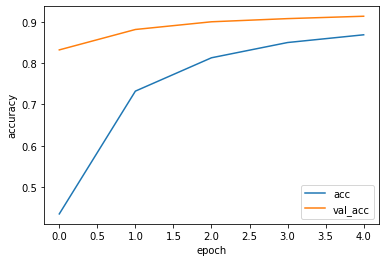

In [14]:
# グラフの表示
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

In [15]:
# 評価
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('loss: {:.3f}\nacc: {:.3f}'.format(test_loss, test_acc ))

313/313 [==============================] - 1s 2ms/step - loss: 0.3338 - acc: 0.9107
loss: 0.334
acc: 0.911


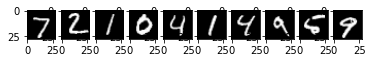

[7 2 1 0 4 1 4 9 6 9]


In [16]:
# 推論する画像の表示
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_images[i].reshape((28, 28)), 'gray')
plt.show()

# 推論したラベルの表示
test_predictions = model.predict(test_images[0:10])
test_predictions = np.argmax(test_predictions, axis=1)
print(test_predictions)